In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
import basicDeltaOperations as op

In [2]:
with open('120k_Data.json') as f:
    neg120k = json.load(f)

with open('EA_IRMS_Data.json') as f:
    EAData = json.load(f)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


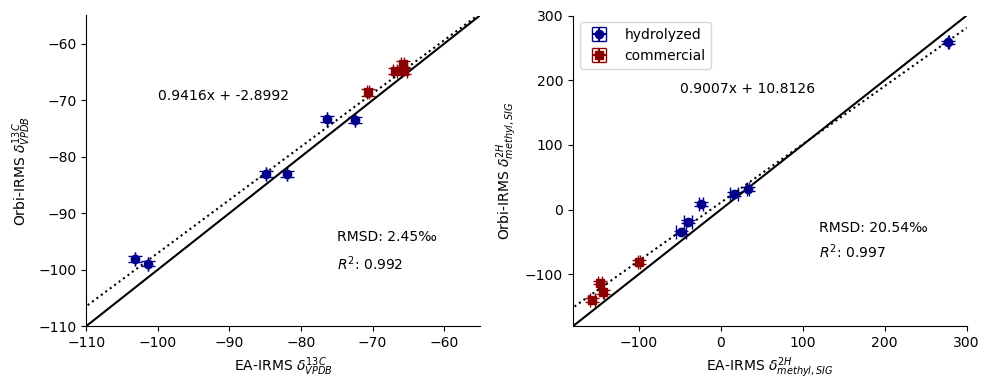

In [13]:
###FIGURE 3
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Caltech 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        crossPlot[MPAKey] = {'13C':[],'13CErr':[],'2H':[],'2HErr':[]}
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        deltaOrbiErr = 0.9 / np.sqrt(len(yDict[MPAKey]['13C/Unsub']['Deltas']))

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = deltaOrbiErr, fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        crossPlot[MPAKey]['13C'] = deltaOrbiVPDB
        crossPlot[MPAKey]['13CErr'] = deltaOrbiErr

        #cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(-75, -100, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-100, -70, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = 3.6 / np.sqrt(len(yDict[MPAKey]['D/Unsub']['Deltas']))
        deltaOrbiScaled = 4/3 * deltaOrbi
        deltaOrbiErrScaled = 4/3 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
                label = 'hydrolyzed'
        else:
                fmt = 's'
                c = 'darkred'
                label = 'commercial'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c, label = label)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        crossPlot[MPAKey]['2H'] = deltaOrbiScaled
        crossPlot[MPAKey]['2HErr'] = deltaOrbiErrScaled

        #cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-180,300)
cAx.set_ylim(-180,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, -35, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-75, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

handles, labels = cAx.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cAx.legend(by_label.values(), by_label.keys())

plt.tight_layout()
sns.despine()

fig.savefig('Figure 3.eps')

In [14]:
#Correct scale compression
for smpKey, smpData in crossPlot.items():
    smpData['13CLinearCorrection'] = (smpData['13C'] + 2.8992) / 0.9416
    smpData['2HLinearCorrection'] = (smpData['2H'] - 10.8126) / 0.9007

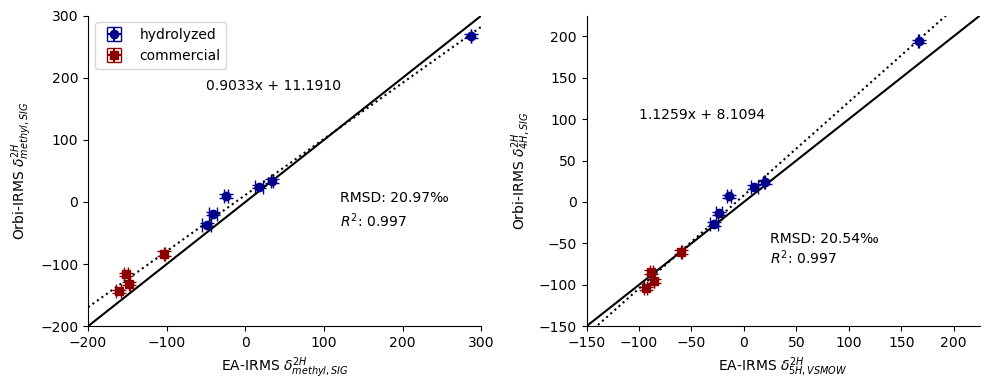

In [15]:
###Supplement: Different Scaling Constant & no scaling constant
import matplotlib.pyplot as plt
import numpy as np

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['UNM 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[1]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = 3.6 / np.sqrt(len(yDict[MPAKey]['D/Unsub']['Deltas']))
        deltaOrbiScaled = deltaOrbi
        deltaOrbiErrScaled = deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled =  deltaEAvsSIG
        deltaEAErrScaled =  deltaEAVSMOWErr
        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        xs.append(deltaEAScaled)
        xerr.append(deltaEAErrScaled)
        ys.append(deltaOrbiScaled)
        yerr.append(deltaOrbiErrScaled)

cAx.set_xlim(-150,225)
cAx.set_ylim(-150,225)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-300,225)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-300,225], [-300,225], color = 'k',linestyle = '-')

cAx.text(25, -50, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(25, -75, '$R^{2}$: ' + f'{r_value:.3f}')
cAx.text(-100, 100, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{5H, VSMOW}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{4H, SIG}$")

cAx = axes[0]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = 3.6 / np.sqrt(len(yDict[MPAKey]['D/Unsub']['Deltas']))
        deltaOrbiScaled = 1.38 * deltaOrbi
        deltaOrbiErrScaled = 1.38 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 1.72 * deltaEAvsSIG
        deltaEAErrScaled = 1.72 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
                label = 'hydrolyzed'
        else:
                fmt = 's'
                c = 'darkred'
                label = 'commercial'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c, label = label)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-200,300)
cAx.set_ylim(-200,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-40, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

handles, labels = cAx.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cAx.legend(by_label.values(), by_label.keys())

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()

A
F
K
I
M
C
ARC
BTC
AA
THR1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


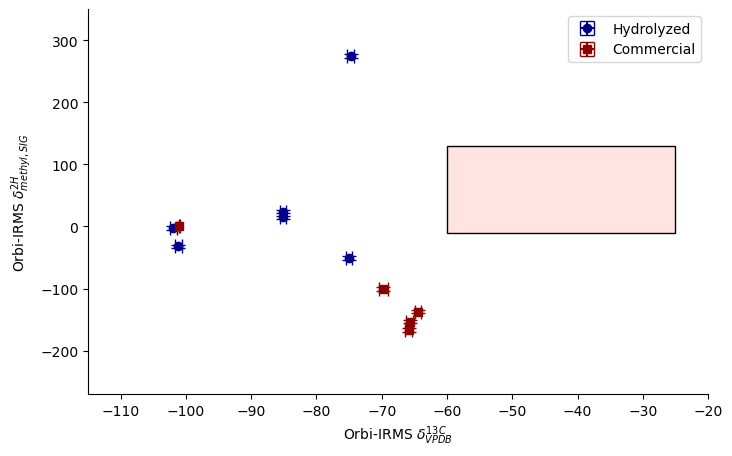

In [17]:
###FIGURE 4
import matplotlib
import matplotlib.patches as patches
matplotlib.rcParams.update({'errorbar.capsize': 5})

fig, ax = plt.subplots(figsize = (8,5))

for MPAKey, MPAData in crossPlot.items():
    print(MPAKey)
    if MPAKey in expSamples:
        fmt = 'o'
        c = 'darkblue'
        label = 'Hydrolyzed'
    else:
        fmt = 's'
        c = 'darkred'
        label = 'Commercial'

    ax.errorbar(MPAData['13CLinearCorrection'],MPAData['2HLinearCorrection'], xerr = MPAData['13CErr'],yerr = MPAData['2HErr'], mfc = c, fmt = fmt, mec = c, ecolor = c, capsize = 5, label = label)

    #ax.text(MPAData['13C']+1, MPAData['2H']+5, MPAKey)

#c = 'darkgoldenrod'
#ax.errorbar(EAData['Caltech 2023']['SIG']['13C/Unsub']['Delta VPDB'], 0, xerr = EAData['Caltech 2023']['SIG']['13C/Unsub']['Error'], yerr = 0, mfc = 'w', mec = c, ecolor = c, label = "Sigma Standard", fmt = '^', capsize = 0,markeredgewidth = 1)
ax.errorbar(EAData['Caltech 2023']['SIG']['13C/Unsub']['Delta VPDB'], 0, xerr = EAData['Caltech 2023']['SIG']['13C/Unsub']['Error'], mfc = 'darkred', mec = 'darkred', capsize = 5, ecolor = 'darkred', fmt = 's')
    
sns.despine()

# Create a rectangle patch
rectangle = patches.Rectangle((-60, -10), 35, 140, edgecolor='k', facecolor='mistyrose')
ax.add_patch(rectangle)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax.set_xlabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")
ax.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")
ax.set_xlim(-115,-20)
ax.set_xticks([-110,-100,-90,-80,-70,-60,-50,-40,-30,-20])
ax.set_ylim(-270,350)

fig.savefig("Figure 4.eps", bbox_inches = 'tight')

In [22]:
#Correct scale compression
scaledDeltas = {}
for smpKey, smpData in neg120k.items():
    if smpKey not in scaledDeltas:
        scaledDeltas[smpKey] = {}
    for isoKey, isoData in smpData.items():
        deltas = isoData['Deltas']
        if isoKey == '13C/Unsub':
            newDeltas = [(x + 2.8992 / 0.9416) for x in deltas]
        if isoKey == 'D/Unsub':
            newDeltas = [(x - 10.8126 / 0.9007) for x in deltas]

        scaledDeltas[smpKey][isoKey] = newDeltas

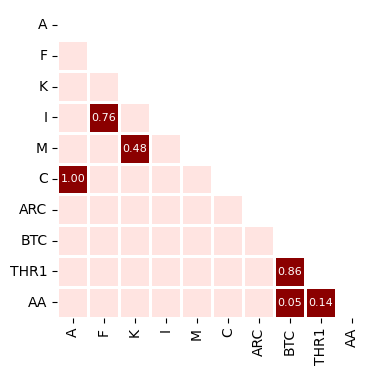

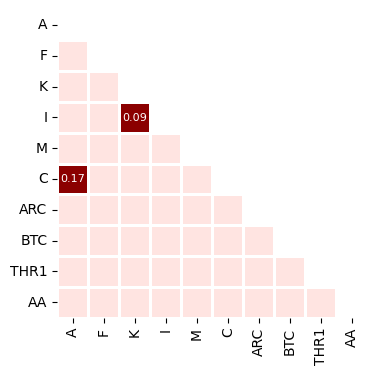

In [33]:
###FIGURE 5
import pandas as pd
import scipy

for plotIdx, ratio in enumerate(['13C/Unsub','D/Unsub']):
    fig, cAx = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))
    p_values = np.zeros((10, 10))

    for idx_i, (key_i, value_i) in enumerate(scaledDeltas.items()):
        for idx_j, (key_j, value_j) in enumerate(scaledDeltas.items()):
            if idx_i != idx_j:  # Avoid comparing a list to itself
                deltas_i = value_i[ratio]
                deltas_j = value_j[ratio]

                _, p_value = scipy.stats.f_oneway(deltas_i, deltas_j)
                p_values[idx_i, idx_j] = p_value

    np.fill_diagonal(p_values, np.nan)
    p_values[np.triu_indices_from(p_values, k=1)] = np.nan 

    # Create a DataFrame for the p-values
    columns = list(scaledDeltas.keys())
    index = list(scaledDeltas.keys())
    p_values_df = pd.DataFrame(p_values, columns=columns, index=index)

    # Define color thresholds and corresponding colors
    bounds = [0, 0.05, 1]
    colors = ['mistyrose', 'darkred'] 

    # Create a colormap with the specified colors and bounds
    cmap_custom = plt.cm.colors.ListedColormap(colors)
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap_custom.N)

    mask = np.triu(np.ones_like(p_values_df, dtype=bool), k=1)
    # Visualize p-values as a heatmap
    heatmap = sns.heatmap(p_values_df, ax =cAx, annot=False, cmap=cmap_custom, cbar = False, linewidths=0.9, linecolor='w',norm = norm, fmt=".2f", mask = mask)

    # Conditionally annotate cells with values above 0.05
    pArr = np.array(p_values_df)
    for i in range(pArr.shape[1]):
        for j in range(0,i+1):
            if pArr[i][j] > 0.05:
                heatmap.text(j + 0.5, i + 0.5, f'{pArr[i, j]:.2f}', ha='center', va='center', color='w', fontsize = 8)

    #cAx.set_title('Pairwise ANOVA P-Values: ' + ratio)

    fig.savefig("Figure 5_" + str(plotIdx) + ".eps", bbox_inches = 'tight')

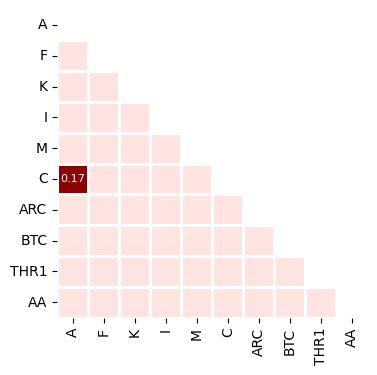

In [34]:
###FIGURE 5
import pandas as pd
import copy

fig, cAx = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

storeDf = {}
for plotIdx, ratio in enumerate(['13C/Unsub','D/Unsub']):
    p_values = np.zeros((10, 10))

    for idx_i, (key_i, value_i) in enumerate(scaledDeltas.items()):
        for idx_j, (key_j, value_j) in enumerate(scaledDeltas.items()):
            if idx_i != idx_j:  # Avoid comparing a list to itself
                deltas_i = value_i[ratio]
                deltas_j = value_j[ratio]

                _, p_value = scipy.stats.f_oneway(deltas_i, deltas_j)
                p_values[idx_i, idx_j] = p_value

    np.fill_diagonal(p_values, np.nan)
    p_values[np.triu_indices_from(p_values, k=1)] = np.nan 

    # Create a DataFrame for the p-values
    columns = list(scaledDeltas.keys())
    index = list(scaledDeltas.keys())
    storeDf[ratio] = copy.deepcopy(p_values)

p_values_df = pd.DataFrame(np.minimum(storeDf['13C/Unsub'],storeDf['D/Unsub']), columns=columns, index=index)
# Define color thresholds and corresponding colors
bounds = [0, 0.025, 1]
colors = ['mistyrose', 'darkred'] 

# Create a colormap with the specified colors and bounds
cmap_custom = plt.cm.colors.ListedColormap(colors)
norm = plt.cm.colors.BoundaryNorm(bounds, cmap_custom.N)

mask = np.triu(np.ones_like(p_values_df, dtype=bool), k=1)
# Visualize p-values as a heatmap
heatmap = sns.heatmap(p_values_df, ax =cAx, annot=False, cmap=cmap_custom, cbar = False, linewidths=0.9, linecolor='w',norm = norm, fmt=".2f", mask = mask)

# Conditionally annotate cells with values above 0.025
pArr = np.array(p_values_df)
for i in range(pArr.shape[1]):
    for j in range(0,i+1):
        if pArr[i][j] > 0.025:
            heatmap.text(j + 0.5, i + 0.5, f'{pArr[i, j]:.2f}', ha='center', va='center', color='w', fontsize = 8)

    #cAx.set_title('Pairwise ANOVA P-Values: ' + ratio)

fig.savefig("Figure 5_" + str(2) + ".eps", bbox_inches = 'tight')

29
Shapiro-Wilk test statistic: 0.9573401212692261
p-value: 0.28222647309303284
0.7281273998611844
29
Shapiro-Wilk test statistic: 0.9788563847541809
p-value: 0.8084171414375305
2.7579843260587724


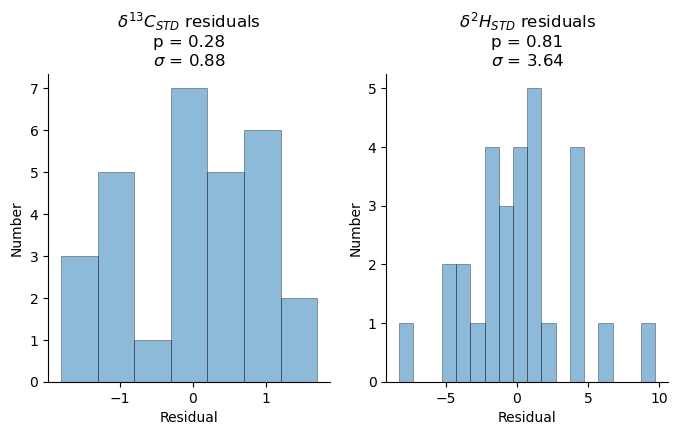

In [8]:
###COMPUTE Methodological Reproducibility
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
storeL = {}
storeRSE = {}
subLabels = ['$\delta^{13}C_{STD}$', '$\delta^{2}H_{STD}$']
subWidth = [0.5,1.0]
for subIdx, subKey in enumerate(['13C/Unsub','D/Unsub']):
    cAx = axes[subIdx]
    thisL = []
    thisRSE = []
    for MPAKey, MPAData in neg120k.items():
        thisSubData = MPAData[subKey]
        deltas = np.array(thisSubData['Deltas'])
        dev = deltas - deltas.mean()
        thisL += list(dev)
        thisRSE += thisSubData['DeltasErr']

    thisL = np.array(thisL)
    cAx.hist(thisL, facecolor = 'tab:blue', edgecolor = 'k', linewidth = 0.5, alpha = 0.5, bins=np. arange(min(thisL), max(thisL) + subWidth[subIdx], subWidth[subIdx]))
    
    print(len(thisL))
    #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/ Shapiro more appropriate than KS for small samples n < 50 (we have n = 30)
    shapiro_result = stats.shapiro(thisL)

    print("Shapiro-Wilk test statistic:", shapiro_result.statistic)
    print("p-value:", shapiro_result.pvalue)

    storeL[subKey] = copy.deepcopy(thisL)
    storeRSE[subKey] = copy.deepcopy(thisRSE)
    print(np.abs(np.array(thisL)).mean())

    cAx.set_title(subLabels[subIdx] + ' residuals\np = ' + f'{shapiro_result.pvalue:.2f}' + '\n$\sigma$ = ' +  f'{thisL.std():.2f}')

    cAx.set_ylabel("Number")
    cAx.set_xlabel("Residual")

sns.despine()